In [1]:
from pathlib import Path
from glob import glob
from itertools import cycle

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import make_interp_spline, BSpline
# from brokenaxes import brokenaxes

# interactive plots
%matplotlib widget

import matrix_r  # module to calculate of matriz distance
import functions  # module with all the individuals function to do analysis
import distance_matrix
import atoms_index_list
import histogram

In [2]:
working_dir: Path = Path("/home/edison/repositories/radial_distribution/zora_so")

if not working_dir.exists():
    working_dir.mkdir()


In [3]:
files_w1: list = glob(str(working_dir / "w1s*.xyz"))
files_w2: list = glob(str(working_dir / "w2s*.xyz"))
files_w3: list = glob(str(working_dir / "w3s*.xyz"))
files_w4: list = glob(str(working_dir / "w4s*.xyz"))
files_w5: list = glob(str(working_dir / "w5s*.xyz"))
files_w6: list = glob(str(working_dir / "w6s*.xyz"))

coordinates_w1: dict = functions.dict_coordinates_xyz(files_w1)
coordinates_w2: dict = functions.dict_coordinates_xyz(files_w2)
coordinates_w3: dict = functions.dict_coordinates_xyz(files_w3)
coordinates_w4: dict = functions.dict_coordinates_xyz(files_w4)
coordinates_w5: dict = functions.dict_coordinates_xyz(files_w5)
coordinates_w6: dict = functions.dict_coordinates_xyz(files_w6)

coordinates_w1


{'/home/edison/repositories/radial_distribution/zora_so/w1s1.xyz':   element  x-coordinate  y-coordinate  z-coordinate
 0      Hg     -0.225130      0.010739       0.00000
 1       O      1.821376     -0.090165       0.00000
 2       H      2.325945      0.187310       0.79892
 3       H      2.325945      0.177310      -0.79892}

In [4]:
files_hf: list = glob(str(working_dir.parent / "files_xyz" / "hf" / "w*.xyz"))
files_pbe0: list = glob(str(working_dir.parent / "files_xyz" / "pbe0" / "w*.xyz"))
files_camb3lyp: list = glob(
    str(working_dir.parent / "files_xyz" / "camb3lyp" / "w*.xyz")
)
files_wb97xd: list = glob(str(working_dir.parent / "files_xyz" / "wb97xd" / "w*.xyz"))
files_b2plyp: list = glob(str(working_dir.parent / "files_xyz" / "b2plyp_grimmeD2" / "w*.xyz"))
files_pbeqidh: list = glob(str(working_dir.parent / "files_xyz" / "pbeqidh" / "w*.xyz"))
files_mp2: list = glob(str(working_dir.parent / "files_xyz" / "mp2" / "w*.xyz"))
files_zora_nr: list = glob(str(working_dir.parent / "files_xyz" / "zora" / "c" / "w*.xyz"))
files_zora_sr: list = glob(str(working_dir.parent / "files_xyz" / "zora" / "sr" / "w*.xyz"))
files_zora_so: list = glob(str(working_dir.parent / "files_xyz" / "zora" / "so" / "w*.xyz"))


coordinates_hf: dict = functions.dict_coordinates_xyz(files_hf)
coordinates_pbe0: dict = functions.dict_coordinates_xyz(files_pbe0)
coordinates_camb3lyp: dict = functions.dict_coordinates_xyz(files_camb3lyp)
coordinates_wb97xd: dict = functions.dict_coordinates_xyz(files_wb97xd)
coordinates_b2plyp: dict = functions.dict_coordinates_xyz(files_b2plyp)
coordinates_pbeqidh: dict = functions.dict_coordinates_xyz(files_pbeqidh)
coordinates_mp2: dict = functions.dict_coordinates_xyz(files_mp2)
coordinates_zora_nr: dict = functions.dict_coordinates_xyz(files_zora_nr)
coordinates_zora_sr: dict = functions.dict_coordinates_xyz(files_zora_sr)
coordinates_zora_so: dict = functions.dict_coordinates_xyz(files_zora_so)

coordinates_mp2


{'/home/edison/repositories/radial_distribution/files_xyz/mp2/w5s7.xyz':    element  x-coordinate  y-coordinate  z-coordinate
 0       Hg      0.904213     -0.008751      0.301419
 1        O     -0.580352      1.054766     -1.229892
 2        H     -1.534924      1.027242     -1.082449
 3        H     -0.419177      1.879801     -1.707020
 4        O      0.762510     -1.470814     -1.270373
 5        H      1.459095     -2.105019     -1.496393
 6        H      0.380152     -1.147330     -2.100149
 7        O      4.332718      1.306042      1.655912
 8        H      4.871531      0.853040      2.316039
 9        H      4.762822      2.152960      1.483447
 10       O      1.896629      1.209512      1.604082
 11       H      2.964187      1.244220      1.679196
 12       H      1.489583      1.394240      2.460919
 13       O     -1.075542     -1.038734      1.037088
 14       H     -1.562679     -0.883323      1.856771
 15       H     -1.305387     -1.937993      0.769120,
 '/home/e

In [5]:
distances_dict_hf: dict = distance_matrix.distance_matrix(coordinates_hf, (0, 0, 0))
distances_dict_pbe0: dict = distance_matrix.distance_matrix(coordinates_pbe0, (0, 0, 0))
distances_dict_camb3lyp: dict = distance_matrix.distance_matrix(
    coordinates_camb3lyp, (0, 0, 0)
)
distances_dict_wb97xd: dict = distance_matrix.distance_matrix(coordinates_wb97xd, (0, 0, 0))
distances_dict_b2plyp: dict = distance_matrix.distance_matrix(
    coordinates_b2plyp, (0, 0, 0)
)
distances_dict_pbeqidh: dict = distance_matrix.distance_matrix(
    coordinates_pbeqidh, (0, 0, 0)
)
distances_dict_mp2: dict = distance_matrix.distance_matrix(coordinates_mp2, (0, 0, 0))
distances_dict_zora_nr: dict = distance_matrix.distance_matrix(coordinates_zora_nr, (0, 0, 0))
distances_dict_zora_sr: dict = distance_matrix.distance_matrix(coordinates_zora_sr, (0, 0, 0))
distances_dict_zora_so: dict = distance_matrix.distance_matrix(coordinates_zora_so, (0, 0, 0))

distances_dict_pbe0


{'/home/edison/repositories/radial_distribution/files_xyz/pbe0/w5s7.xyz':    atoms         0         1         2         3         4         5  \
 0     Hg  0.000000  2.343871  2.954979  2.994153  2.283344  2.938378   
 1      O  2.343871  0.000000  0.964454  0.964586  3.086594  4.005807   
 2      H  2.954979  0.964454  0.000000  1.547005  3.623975  4.583611   
 3      H  2.994153  0.964586  1.547005  0.000000  3.789978  4.645613   
 4      O  2.283344  3.086594  3.623975  3.789978  0.000000  0.965072   
 5      H  2.938378  4.005807  4.583611  4.645613  0.965072  0.000000   
 6      H  2.865561  2.909099  3.418545  3.506422  0.965295  1.553259   
 7      O  4.018811  5.876478  6.702128  6.034403  5.109549  4.995061   
 8      H  4.638137  6.655987  7.437040  6.880510  5.704090  5.514264   
 9      H  4.669206  6.281761  7.152995  6.301492  5.706270  5.589144   
 10     O  2.096023  3.824586  4.526268  4.057993  4.042218  4.396160   
 11     H  2.838739  4.683509  5.452992  4.882021  

In [6]:
grid = (0.8, 2.7, 0.1)

# - number of bins for the accurences
rmin, rmax, dr = grid
nbins = int((rmax - rmin) / dr)


In [7]:
atoms_list: list = ["Hg", "O", "H", "H"]

atoms_index_dict_hf: dict = atoms_index_list.atoms_index_dict(
    distances_dict_hf, atoms_list, grid
)
atoms_index_dict_pbe0: dict = atoms_index_list.atoms_index_dict(
    distances_dict_pbe0, atoms_list, grid
)
atoms_index_dict_camb3lyp: dict = atoms_index_list.atoms_index_dict(
    distances_dict_camb3lyp, atoms_list, grid
)
atoms_index_dict_wb97xd: dict = atoms_index_list.atoms_index_dict(
    distances_dict_wb97xd, atoms_list, grid
)
atoms_index_dict_b2plyp: dict = atoms_index_list.atoms_index_dict(
    distances_dict_b2plyp, atoms_list, grid
)
atoms_index_dict_pbeqidh: dict = atoms_index_list.atoms_index_dict(
    distances_dict_pbeqidh, atoms_list, grid
)
atoms_index_dict_mp2: dict = atoms_index_list.atoms_index_dict(
    distances_dict_mp2, atoms_list, grid
)

atoms_index_dict_zora_nr: dict = atoms_index_list.atoms_index_dict(
    distances_dict_zora_nr, atoms_list, grid
)
atoms_index_dict_zora_sr: dict = atoms_index_list.atoms_index_dict(
    distances_dict_zora_sr, atoms_list, grid
)
atoms_index_dict_zora_so: dict = atoms_index_list.atoms_index_dict(
    distances_dict_zora_so, atoms_list, grid
)

atoms_index_dict_hf


{'/home/edison/repositories/radial_distribution/files_xyz/hf/w5s7.xyz': [(0,
   1,
   2,
   3),
  (0, 4, 5, 6),
  (0, 10, 11, 12),
  (0, 13, 14, 15)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w2s1.xyz': [(0,
   1,
   2,
   3),
  (0, 4, 5, 6)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w5s5.xyz': [(0,
   1,
   2,
   3),
  (0, 4, 5, 6),
  (0, 10, 11, 12)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w4s3.xyz': [(12,
   4,
   3,
   5),
  (12, 7, 6, 8)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w4s2.xyz': [(12,
   1,
   0,
   2),
  (12, 4, 3, 5)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w5s8.xyz': [(15,
   1,
   0,
   2),
  (15, 4, 3, 5),
  (15, 7, 6, 8),
  (15, 10, 9, 11),
  (15, 13, 12, 14)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w6s12.xyz': [(18,
   4,
   3,
   5),
  (18, 7, 6, 8),
  (18, 10, 9, 11)],
 '/home/edison/repositories/radial_distribution/files_xyz/hf/w6s24.x

In [8]:
# - dihedral analysis; i.e., input_list = [A, B, C, D]

# grid = 0.1 --> 3600 = (3600 - 0)/0.1
delta_angle = 5.0
min_angle = 0
max_angle = 360

nbins_angle = int((max_angle - min_angle) / delta_angle)


In [9]:
# - torsion angle distribution analysis (TDA); i.e., atoms_list_AB = [A, B, C, D]
histogram_hf: np.array = histogram.tda(
    atoms_index_dict_hf, coordinates_hf, delta_angle, nbins_angle
)
histogram_pbe0: np.array = histogram.tda(
    atoms_index_dict_pbe0, coordinates_pbe0, delta_angle, nbins_angle
)
histogram_camb3lyp: np.array = histogram.tda(
    atoms_index_dict_camb3lyp, coordinates_camb3lyp, delta_angle, nbins_angle
)
histogram_wb97xd: np.array = histogram.tda(
    atoms_index_dict_wb97xd, coordinates_wb97xd, delta_angle, nbins_angle
)
histogram_b2plyp: np.array = histogram.tda(
    atoms_index_dict_b2plyp, coordinates_b2plyp, delta_angle, nbins_angle
)
histogram_pbeqidh: np.array = histogram.tda(
    atoms_index_dict_pbeqidh, coordinates_pbeqidh, delta_angle, nbins_angle
)
histogram_mp2: np.array = histogram.tda(
    atoms_index_dict_mp2, coordinates_mp2, delta_angle, nbins_angle
)
histogram_zora_nr: np.array = histogram.tda(
    atoms_index_dict_zora_nr, coordinates_zora_nr, delta_angle, nbins_angle
)
histogram_zora_sr: np.array = histogram.tda(
    atoms_index_dict_zora_sr, coordinates_zora_sr, delta_angle, nbins_angle
)
histogram_zora_so: np.array = histogram.tda(
    atoms_index_dict_zora_so, coordinates_zora_so, delta_angle, nbins_angle
)



histogram_pbeqidh


array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  0,  0,  0,  1,  1,  4,  0,  0,  2,  2, 11, 26, 18, 23, 11,
        4, 11, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0])

In [10]:
# - saving histogram
distribution_angle = np.linspace(min_angle, max_angle, nbins_angle, endpoint=False)

histograms: list = [
    histogram_hf,
    histogram_pbe0,
    histogram_camb3lyp,
    histogram_wb97xd,
    histogram_b2plyp,
    histogram_pbeqidh,
    histogram_mp2,
    histogram_zora_nr,
    histogram_zora_sr,
    histogram_zora_so,
]

for count, hist in enumerate(histograms):
    histogram_name = working_dir / (
        f"tda_w{count + 1}_" + "-".join(atoms_list) + ".dat"
    )
    np.savetxt(
        histogram_name,
        np.transpose([distribution_angle, hist]),
        delimiter=" ",
        header=f"distance [Angstrom]   occurrence (total={sum(hist)})",
        fmt="%.6f %28i",
    )


In [11]:
histogram_hf_nan = histogram_hf.astype("float")
histogram_pbe0_nan = histogram_pbe0.astype("float")
histogram_camb3lyp_nan = histogram_camb3lyp.astype("float")
histogram_wb97xd_nan = histogram_wb97xd.astype("float")
histogram_b2plyp_nan = histogram_b2plyp.astype("float")
histogram_pbeqidh_nan = histogram_pbeqidh.astype("float")
histogram_mp2_nan = histogram_mp2.astype("float")
histogram_zora_nr_nan = histogram_zora_nr.astype("float")
histogram_zora_sr_nan = histogram_zora_sr.astype("float")
histogram_zora_so_nan = histogram_zora_so.astype("float")


histogram_hf_nan[histogram_hf_nan == 0] = float("nan")
histogram_pbe0_nan[histogram_pbe0_nan == 0] = float("nan")
histogram_wb97xd_nan[histogram_wb97xd_nan == 0] = float("nan")
histogram_camb3lyp_nan[histogram_camb3lyp_nan == 0] = float("nan")
histogram_b2plyp_nan[histogram_b2plyp_nan == 0] = float("nan")
histogram_pbeqidh_nan[histogram_pbeqidh_nan == 0] = float("nan")
histogram_mp2_nan[histogram_mp2_nan == 0] = float("nan")
histogram_zora_nr_nan[histogram_zora_nr_nan == 0] = float("nan")
histogram_zora_sr_nan[histogram_zora_sr_nan == 0] = float("nan")
histogram_zora_so_nan[histogram_zora_so_nan == 0] = float("nan")


In [12]:
# - dihedral analysis; i.e., input_list = [A, B, C, D]

# # grid = 0.1 --> 3600 = (3600 - 0)/0.1
# delta_angle = 10.0
# min_angle = 0
# max_angle = 360

# nbins_angle = int((max_angle - min_angle) / delta_angle)

# # -------------------------------------------------
# grid_all = (0.8, 2.7, 0.1)

# # - number of bins for the accurences
# rmin_all, rmax_all, dr_all = grid_all
# nbins_all = int((rmax_all - rmin_all) / dr_all)

# distribution_angle_angle_all = np.linspace(
#     rmin_all, rmax_all, nbins_all, endpoint=False
# )

# files_all: list = glob(str(working_dir / "w*.xyz"))
# coordinates_all: dict = functions.dict_coordinates_xyz(files_all)
# distances_dict_all: dict = distance_matrix.distance_matrix(coordinates_all, (0, 0, 0))

# atoms_index_dict_all: dict = atoms_index_list.atoms_index_dict(
#     distances_dict_all, atoms_list, grid_all
# )
# histogram_all: np.array = histogram.tda(
#     atoms_index_dict_all, coordinates_all, delta_angle, nbins_angle
# )

# -----------------------------------------------------------------------------------------------------------------------
from scipy.interpolate import make_interp_spline, BSpline

x = np.linspace(min_angle, max_angle, nbins_angle, endpoint=False)
smooth_x = np.linspace(x[0], x[-1], len(x) * 100, endpoint=False)

y_hf = histogram_hf
smooth = make_interp_spline(x, y_hf, k=3)
smooth_y_hf = smooth(smooth_x)

y_pbe0 = histogram_pbe0
smooth = make_interp_spline(x, y_pbe0, k=3)
smooth_y_pbe0 = smooth(smooth_x)

y_wb97xd = histogram_wb97xd
smooth = make_interp_spline(x, y_wb97xd, k=3)
smooth_y_wb97xd = smooth(smooth_x)

y_camb3lyp = histogram_camb3lyp
smooth = make_interp_spline(x, y_camb3lyp, k=3)
smooth_y_camb3lyp = smooth(smooth_x)

y_b2plyp = histogram_b2plyp
smooth = make_interp_spline(x, y_b2plyp, k=3)
smooth_y_b2plyp = smooth(smooth_x)

y_pbeqidh = histogram_pbeqidh
smooth = make_interp_spline(x, y_pbeqidh, k=3)
smooth_y_pbeqidh = smooth(smooth_x)

y_mp2 = histogram_mp2
smooth = make_interp_spline(x, y_mp2, k=3)
smooth_y_mp2 = smooth(smooth_x)

y_zora_nr = histogram_zora_nr
smooth = make_interp_spline(x, y_zora_nr, k=3)
smooth_y_zora_nr = smooth(smooth_x)

y_zora_sr = histogram_zora_sr
smooth = make_interp_spline(x, y_zora_sr, k=3)
smooth_y_zora_sr = smooth(smooth_x)

y_zora_so = histogram_zora_so
smooth = make_interp_spline(x, y_zora_so, k=3)
smooth_y_zora_so = smooth(smooth_x)

/tmp/ipykernel_628388/1416589247.py:76: RuntimeWarning: invalid value encountered in true_divide
  smooth_y_wb97xd / total_wb97xd,
/tmp/ipykernel_628388/1416589247.py:84: RuntimeWarning: invalid value encountered in true_divide
  smooth_y_b2plyp / total_b2plyp,


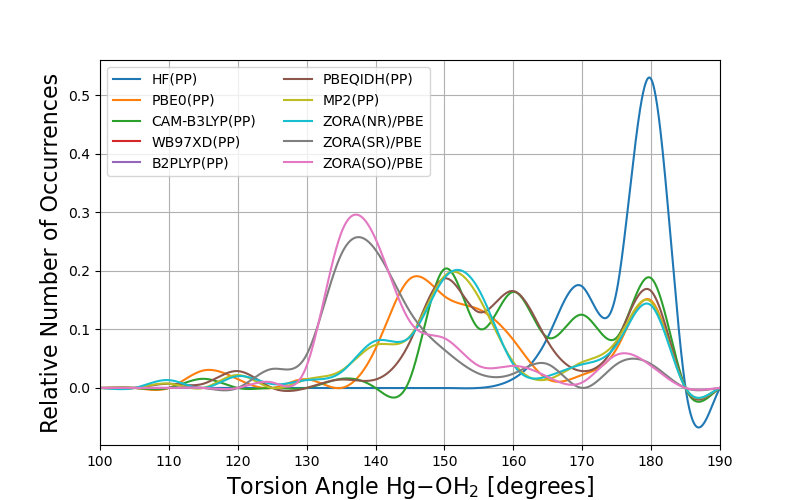

In [13]:
fig = plt.figure(figsize=(8, 5))

# ax = brokenaxes(ylims=((0, 0.25),(0.95, 1.05)), hspace=.2)
ax = fig.add_subplot(111)
ax.grid(b=True, which="major")

# - lines style in a for loop
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-d'] #, '-h', '-p', '-D', '-H']
lines = ["s", "^", "v", "<", ">", ".", "s", "d", "o"]  # , '-h', '-p', '-D', '-H']
# lines = ['-o', '-^', '-v', '-<', '->', '-s', '-+', '-x', '-d', '-1', '-2', '-3', '-4', '-h', '-p', '-|', '-_', '-D', '-H']
# lines = ["-","--","-.",":"]
linecycler = cycle(lines)

cm = cycle(
    [
        "#1f77b4",
        "#ff7f0e",
        "#2ca02c",
        "#d62728",
        "#9467bd",
        "#8c564b",
        "#bcbd22",
        "#17becf",
        "#7f7f7f",
        "#e377c2",
    ]
)

# ax.axhline(y=0, color='black', linestyle='-', linewidth=0.7)

total_hf = sum(histogram_hf)
total_pbe0 = sum(histogram_pbe0)
total_camb3lyp = sum(histogram_camb3lyp)
total_wb97xd = sum(histogram_wb97xd)
total_b2plyp = sum(histogram_b2plyp)
total_pbeqidh = sum(histogram_pbeqidh)
total_mp2 = sum(histogram_mp2)
total_zora_nr = sum(histogram_zora_nr)
total_zora_sr = sum(histogram_zora_sr)
total_zora_so = sum(histogram_zora_so)

# plt.plot(
#     smooth_x,
#     smooth_y_hf / total_hf,
#     where=(smooth_y_hf / total_hf>0),
#     alpha=0.3,
#     color=next(cm),
#     label="HF",
#     )
plt.plot(
    smooth_x,
    smooth_y_hf / total_hf,
    # where=(smooth_y_hf / total_hf>0),
    # alpha=0.3,
    color=next(cm),
    label="HF(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_pbe0 / total_pbe0,
    # where=(smooth_y_pbe0 / total_pbe0>0),
    # alpha=0.3,
    color=next(cm),
    label="PBE0(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_camb3lyp / total_camb3lyp,
    # where=(smooth_y_camb3lyp / total_camb3lyp>0),
    # alpha=0.3,
    color=next(cm),
    label="CAM-B3LYP(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_wb97xd / total_wb97xd,
    # where=(smooth_y_wb97xd / total_wb97xd>0),
    # alpha=0.3,
    color=next(cm),
    label="WB97XD(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_b2plyp / total_b2plyp,
    # where=(smooth_y_b2plyp / total_b2plyp>0),
    # alpha=0.3,
    color=next(cm),
    label="B2PLYP(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_pbeqidh / total_pbeqidh,
    # where=(smooth_y_pbeqidh / total_pbeqidh>0),
    # alpha=0.3,
    color=next(cm),
    label="PBEQIDH(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_mp2 / total_mp2,
    # where=(smooth_y_mp2 / total_mp2>0),
    # alpha=0.3,
    color=next(cm),
    label="MP2(PP)",
    )
plt.plot(
    smooth_x,
    smooth_y_zora_nr / total_zora_nr,
    # where=(smooth_y_mp2 / total_mp2>0),
    # alpha=0.3,
    color=next(cm),
    label="ZORA(NR)/PBE",
    )
plt.plot(
    smooth_x,
    smooth_y_zora_sr / total_zora_sr,
    # where=(smooth_y_mp2 / total_mp2>0),
    # alpha=0.3,
    color=next(cm),
    label="ZORA(SR)/PBE",
    )
plt.plot(
    smooth_x,
    smooth_y_zora_so / total_zora_so,
    # where=(smooth_y_mp2 / total_mp2>0),
    # alpha=0.3,
    color=next(cm),
    label="ZORA(SO)/PBE",
    )
plt.xlim(100, 190)
# plt.ylim(0.001, 1.1)

# ax.xaxis.set_major_locator(MultipleLocator(0.1))

ax.set_ylabel("Relative Number of Occurrences", fontsize=16)
ax.set_xlabel(r"Torsion Angle Hg$-$OH$_2$ [degrees]", fontsize=16)
plt.legend(loc="upper left", fontsize=10, ncol=2)

fig.savefig(
    working_dir / "tda_all_HgOHH.pdf",
    dpi=500,
    bbox_inches="tight",
)
